# Código (pruebas)

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#!pip install matplotlib

### Test de Bechdel

El test de Bechdel es una medida de la representación de las mujeres en el cine.
Consta de tres criterios:

1. La película debe tener al menos dos personajes femeninos con nombres.
2. Estas mujeres deben tener una conversación entre ellas.
3. La conversación no debe tratar sobre un hombre.

## df_1

Incluye datos respecto al **rendimiento en taquilla de películas con protagonistas femeninas**. Examina datos de películas lanzadas entre **1970 y 2013**, incluyendo sus presupuestos, ingresos nacionales e internacionales, y su estado de aprobación o rechazo en el **Test de Bechdel**, un punto de referencia que mide los sesgos de género en las películas.

Nombres iniciales de las columnas y los datos que representan en el df 1:
- year:	Año en que se lanzó la película.
- imdb: Rating de la película en IMDB.
- title: Título.
- test: Si pasa o no el test de Bechdel.
- clean_test: Si la película pasó el Test de Bechdel sin ningún tipo de salvedades.
- binary: Si pasa o no el test de Bechdel.
- budget:	Presupuesto de la película en millones.
- domgross:	Ingresos nacionales de la película en millones.
- intgross:	Ingresos internacionales de la película en millones.
- code:	Combina año y resultado de test.
- budget_2013$:	Presupuesto de la película en dólares de 2013.
- domgross_2013$: Ingresos nacionales de la película en dólares de 2013.
- intgross_2013$:	Ingresos internacionales de la película en dólares de 2013
- period code:	Código del período de la película.
- decade code:	Código de la década de la película.

In [15]:
df_1 = pd.read_csv ('data/Box Office Female Leads/movies.csv')

In [16]:
df_1

,index,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1789,1971,tt0067741,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,305063707,404702718.0,616827003.0,NaN,NaN
1790,1790,1971,tt0067800,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,143862856,59412143.0,64760273.0,NaN,NaN
1791,1791,1971,tt0067116,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,12659931,236848653.0,236848653.0,NaN,NaN
1792,1792,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,17263543,23018057.0,23018057.0,NaN,NaN


In [17]:
# Indicar nuevo index
df_1.set_index('index', inplace = True) 

In [18]:
df_1

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
index,,,,,,,,,,,,,,,
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1971,tt0067741,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,305063707,404702718.0,616827003.0,NaN,NaN
1790,1971,tt0067800,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,143862856,59412143.0,64760273.0,NaN,NaN
1791,1971,tt0067116,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,12659931,236848653.0,236848653.0,NaN,NaN


In [19]:
df_1[['title','binary']]

,title,binary
index,,
0,21 &amp; Over,FAIL
1,Dredd 3D,PASS
2,12 Years a Slave,FAIL
3,2 Guns,FAIL
4,42,FAIL
...,...,...
1789,Shaft,FAIL
1790,Straw Dogs,FAIL
1791,The French Connection,FAIL


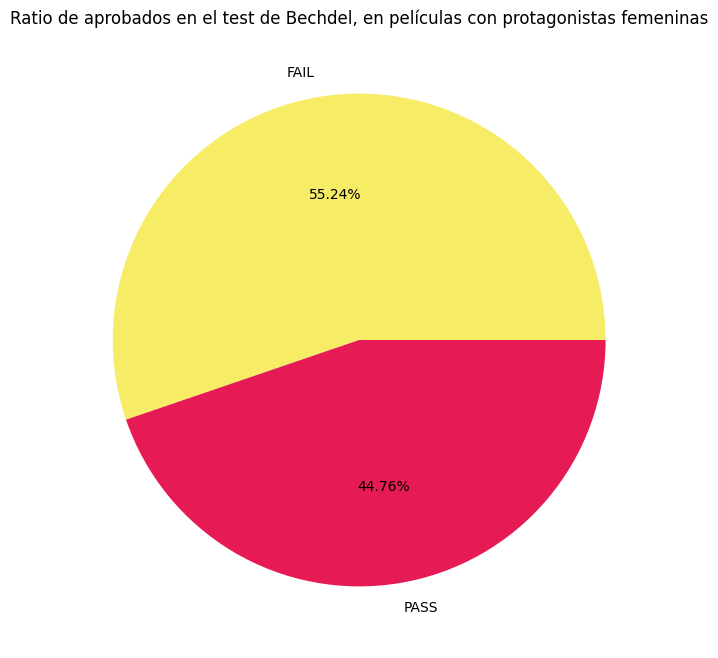

In [20]:
# Películas (1970-2013) con alguna protagonista femenina que pasan o suspenden el test de Bechdel.

data = df_1["binary"].value_counts()

# Colores
colors = ["#F7EC66", "#E61A54"]
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)
p = plt.gcf()
title = 'Ratio de aprobados en el test de Bechdel, en películas con protagonistas femeninas'
plt.title(title)
plt.show()

## df_2: API Bechdel

- rating: Puntuación Bechdel de la película de 0 a 3. Una puntuación Bechdel inferior a 3 significa que la película no pasó el test Bechdel, y una puntuación Bechdel de 3 significa que la película lo aprobó.
- imdbid: El número IMDB de la película.
- title: Nombre de la película.
- id: ID único de la película.
- year: Año de estreno de la película.

In [9]:
import urllib,json

df_2 = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

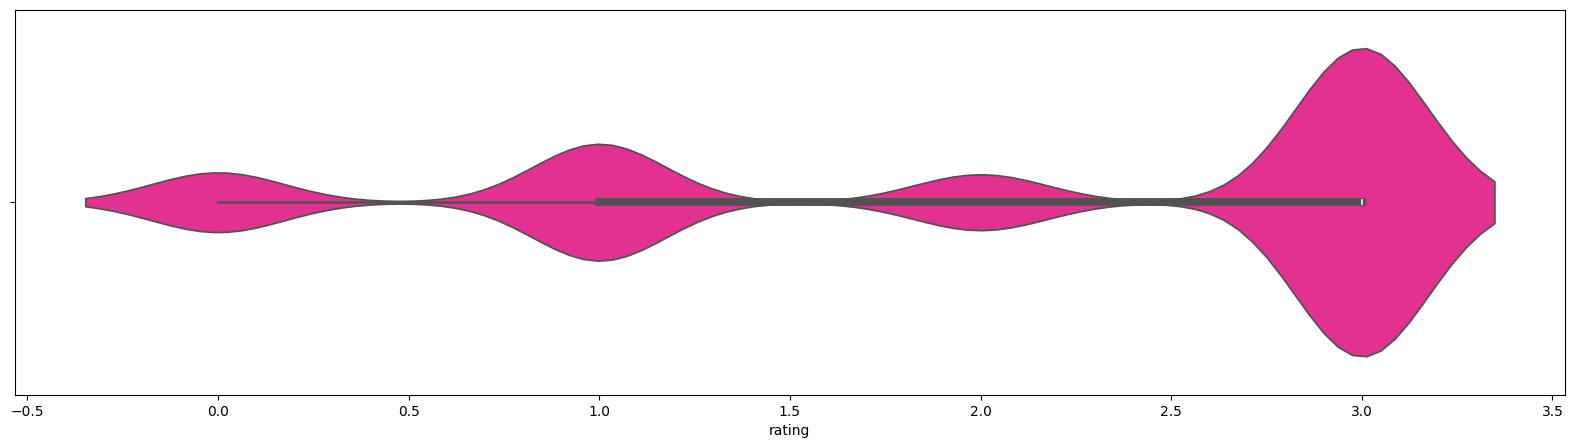

In [21]:
plt.figure(figsize=(20,5))
sns.violinplot(x = df_2["rating"], color='deeppink');

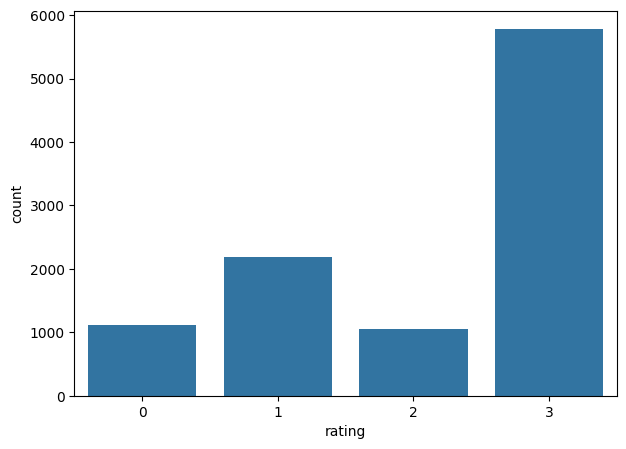

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_2["rating"]);

In [23]:
# Una puntuación Bechdel inferior a 3 significa que la película no pasó el test Bechdel,
# y una puntuación Bechdel de 3 significa que la película lo aprobó.'''

# Asignar "FAIL" o "PASS" según el valor en la columna "rating"
def asignar_bechdel(row):
    if row['rating'] < 3:
        return "FAIL"
    elif row['rating'] == 3:
        return "PASS"
    else:
        return None

# Crea la columna "bechdel"
df_2['bechdel'] = df_2.apply(asignar_bechdel, axis=1)


In [24]:
df_2

,imdbid,year,id,rating,title,bechdel
0,3155794,1874,9602,0,Passage de Venus,FAIL
1,14495706,1877,9804,0,La Rosace Magique,FAIL
2,2221420,1878,9603,0,Sallie Gardner at a Gallop,FAIL
3,12592084,1878,9806,0,Le singe musicien,FAIL
4,7816420,1881,9816,0,Athlete Swinging a Pick,FAIL
...,...,...,...,...,...,...
10131,19623240,2023,10995,3,Winnie-the-Pooh: Blood and Honey,PASS
10132,1695843,2023,10996,3,Haunted Mansion,PASS
10133,11820950,2023,11009,3,"Portable Door, The",PASS
10134,17009710,2023,11010,3,Anatomie d&#39;une chute,PASS


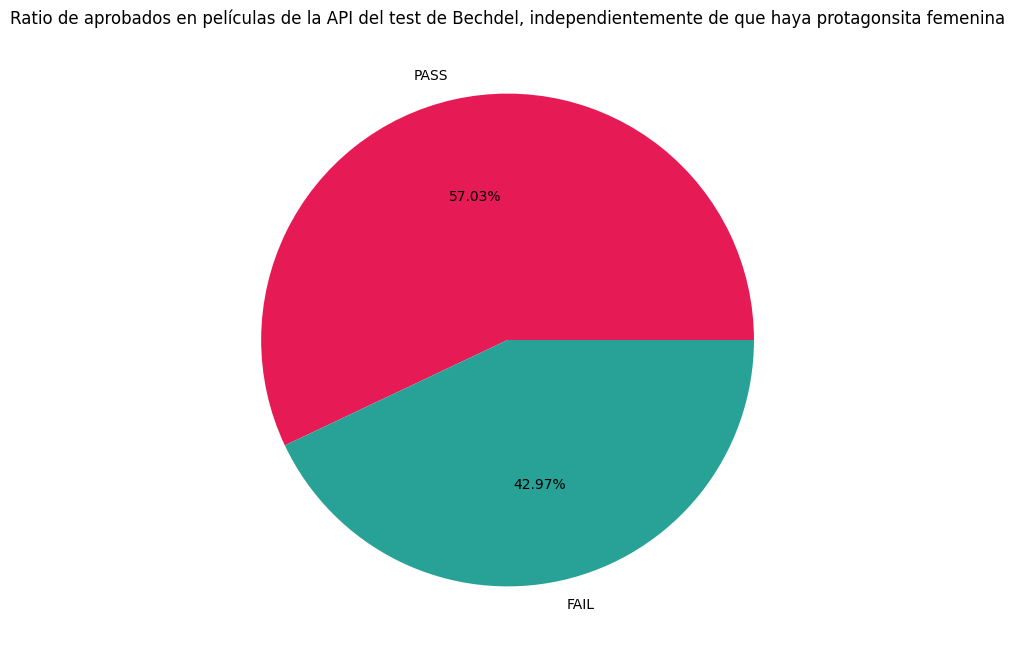

In [12]:
# Películas (1874-2023) sacadas de la API de bechdeltest.

data = df_2["bechdel"].value_counts()

# Colores
colors = ["#E61A54","#28A296"]
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)
p = plt.gcf()
title = 'Ratio de aprobados en películas de la API del test de Bechdel, independientemente de que haya protagonista femenina'
plt.title(title)
plt.show()

## df_3: csv excel género de directores y género pelis 2023

In [25]:
df_3 = pd.read_csv('data/dir_gender_genre.csv')

In [129]:
# Reemplazar '&eacute;' por é
#df_3['title'] = df_3['title'].str.replace('&eacute;', "é")

In [26]:
df_3

,title,dir_gender,genre
0,Spider-Man: Across the Spider-Verse,M,animación
1,Reflect,M,corto
2,Ant-Man and the Wasp: Quantumania,M,acción
3,Pathaan,M,acción
4,Infinity Pool,M,terror
5,Astérix et Obélix: L'Empire du Milieu,M,aventura
6,Cocaine Bear,F,comedia
7,Les choses simples,M,comedia
8,65,M,acción
9,SCREAM VI,M,terror


In [27]:
df_3['genre'].value_counts(ascending=False)

genre
comedia      13
acción       10
drama         9
terror        6
animación     4
aventura      4
biografía     3
corto         1
suspense      1
Name: count, dtype: int64

## df_1 + df_2

In [28]:
# Concatenar df 1, df 2
df_12 = pd.concat([df_1, df_2])

In [29]:
df_12

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,imdbid,id,rating,bechdel
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000.0,25682380.0,42195766.0,2013FAIL,13000000.0,25682380.0,42195766.0,1.0,1.0,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000.0,13414714.0,40868994.0,2012PASS,45658735.0,13611086.0,41467257.0,1.0,1.0,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000.0,53107035.0,158607035.0,2013FAIL,20000000.0,53107035.0,158607035.0,1.0,1.0,NaN,NaN,NaN,NaN
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000.0,75612460.0,132493015.0,2013FAIL,61000000.0,75612460.0,132493015.0,1.0,1.0,NaN,NaN,NaN,NaN
4,2013,tt0453562,42,men,men,FAIL,40000000.0,95020213.0,95020213.0,2013FAIL,40000000.0,95020213.0,95020213.0,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,2023,NaN,Winnie-the-Pooh: Blood and Honey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19623240,10995.0,3.0,PASS
10132,2023,NaN,Haunted Mansion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1695843,10996.0,3.0,PASS
10133,2023,NaN,"Portable Door, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11820950,11009.0,3.0,PASS
10134,2023,NaN,Anatomie d&#39;une chute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17009710,11010.0,3.0,PASS


In [30]:
# Quitar NaN
df_12 = df_12.fillna('')

In [31]:
df_12

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,imdbid,id,rating,bechdel
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000.0,25682380.0,42195766.0,2013FAIL,13000000.0,25682380.0,42195766.0,1.0,1.0,,,,
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000.0,13414714.0,40868994.0,2012PASS,45658735.0,13611086.0,41467257.0,1.0,1.0,,,,
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000.0,53107035.0,158607035.0,2013FAIL,20000000.0,53107035.0,158607035.0,1.0,1.0,,,,
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000.0,75612460.0,132493015.0,2013FAIL,61000000.0,75612460.0,132493015.0,1.0,1.0,,,,
4,2013,tt0453562,42,men,men,FAIL,40000000.0,95020213.0,95020213.0,2013FAIL,40000000.0,95020213.0,95020213.0,1.0,1.0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,2023,,Winnie-the-Pooh: Blood and Honey,,,,,,,,,,,,,19623240,10995.0,3.0,PASS
10132,2023,,Haunted Mansion,,,,,,,,,,,,,1695843,10996.0,3.0,PASS
10133,2023,,"Portable Door, The",,,,,,,,,,,,,11820950,11009.0,3.0,PASS
10134,2023,,Anatomie d&#39;une chute,,,,,,,,,,,,,17009710,11010.0,3.0,PASS


In [32]:
# Combinar columnas 'binary' y 'bechdel' en columna 'test_bechdel'
df_12['test_bechdel'] = df_12['binary'].astype(str) + df_12['bechdel'].astype(str)

In [33]:
df_12

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,imdbid,id,rating,bechdel,test_bechdel
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000.0,25682380.0,42195766.0,2013FAIL,13000000.0,25682380.0,42195766.0,1.0,1.0,,,,,FAIL
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000.0,13414714.0,40868994.0,2012PASS,45658735.0,13611086.0,41467257.0,1.0,1.0,,,,,PASS
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000.0,53107035.0,158607035.0,2013FAIL,20000000.0,53107035.0,158607035.0,1.0,1.0,,,,,FAIL
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000.0,75612460.0,132493015.0,2013FAIL,61000000.0,75612460.0,132493015.0,1.0,1.0,,,,,FAIL
4,2013,tt0453562,42,men,men,FAIL,40000000.0,95020213.0,95020213.0,2013FAIL,40000000.0,95020213.0,95020213.0,1.0,1.0,,,,,FAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,2023,,Winnie-the-Pooh: Blood and Honey,,,,,,,,,,,,,19623240,10995.0,3.0,PASS,PASS
10132,2023,,Haunted Mansion,,,,,,,,,,,,,1695843,10996.0,3.0,PASS,PASS
10133,2023,,"Portable Door, The",,,,,,,,,,,,,11820950,11009.0,3.0,PASS,PASS
10134,2023,,Anatomie d&#39;une chute,,,,,,,,,,,,,17009710,11010.0,3.0,PASS,PASS


In [34]:
# eliminar columnas y asignar a df_bech12
df_bech12 = df_12.drop(['test','clean_test','code','imdb', 'budget', 'domgross', 'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','period code','decade code','imdbid','id', 'binary','rating','bechdel'], axis=1)

In [35]:
df_bech12

,year,title,test_bechdel
0,2013,21 &amp; Over,FAIL
1,2012,Dredd 3D,PASS
2,2013,12 Years a Slave,FAIL
3,2013,2 Guns,FAIL
4,2013,42,FAIL
...,...,...,...
10131,2023,Winnie-the-Pooh: Blood and Honey,PASS
10132,2023,Haunted Mansion,PASS
10133,2023,"Portable Door, The",PASS
10134,2023,Anatomie d&#39;une chute,PASS


In [36]:
# Reemplazar '&#39;' por (')
df_bech12['title'] = df_bech12['title'].str.replace('&#39;', "'")


In [37]:
# Reemplazar '&amp;' por (and)
df_bech12['title'] = df_bech12['title'].str.replace('&amp;', "and")

In [38]:
# Reemplazar '"' por ( )
df_bech12['title'] = df_bech12['title'].str.replace('"', "")

In [39]:
# Reemplazar '&eacute;' por é
df_bech12['title'] = df_bech12['title'].str.replace('&eacute;', "é")


In [40]:
# Reemplazar "" por ___
df_bech12['title'] = df_bech12['title'].str.replace('"', "")

In [41]:
df_bech12

,year,title,test_bechdel
0,2013,21 and Over,FAIL
1,2012,Dredd 3D,PASS
2,2013,12 Years a Slave,FAIL
3,2013,2 Guns,FAIL
4,2013,42,FAIL
...,...,...,...
10131,2023,Winnie-the-Pooh: Blood and Honey,PASS
10132,2023,Haunted Mansion,PASS
10133,2023,"Portable Door, The",PASS
10134,2023,Anatomie d'une chute,PASS


In [43]:
# Verificar duplicados.
duplicados = df_bech12[df_bech12.duplicated(subset="title", keep=False)]

# Si hay valores duplicados, mostrar los valores y las filas duplicadas en la columna "title"
if not duplicados.empty:
    print("Valores duplicados en la columna 'title' y sus filas correspondientes:")
    print(duplicados.sort_values("title"))
else:
    print("No hay valores duplicados en la columna 'title'.")


Valores duplicados en la columna 'title' y sus filas correspondientes:
      year                       title test_bechdel
5797  2009        (500) Days of Summer         FAIL
438   2009        (500) Days of Summer         FAIL
3669  1999  10 Things I Hate About You         PASS
1278  1999  10 Things I Hate About You         PASS
2     2013            12 Years a Slave         FAIL
...    ...                         ...          ...
4980  2006                   Zwartboek         PASS
5373  2007                       [Rec]         PASS
663   2007                       [Rec]         PASS
4211  2002                         xXx         FAIL
1150  2002                         xXx         FAIL

[3332 rows x 3 columns]


In [44]:
# Eliminar duplicados en base a la columna "title"
df_bech_def = df_bech12.drop_duplicates(subset="title")


In [45]:
# Verificar duplicados.
duplicados = df_bech_def[df_bech_def.duplicated(subset="title", keep=False)]

# Si hay valores duplicados, mostrar los valores y las filas duplicadas en la columna "title"
if not duplicados.empty:
    print("Valores duplicados en la columna 'title' y sus filas correspondientes:")
    print(duplicados.sort_values("title"))
else:
    print("No hay valores duplicados en la columna 'title'.")

No hay valores duplicados en la columna 'title'.


In [46]:
# Limpiar duplicados encontrados al editar en excel:

'''Duplicados:
10090  2023                       Super Mario Bros. Movie, The         FAIL
10097  2023                        Super Mario Bros Movie, The         FAIL

10100  2023                                         Bad Living         PASS
10101  2023                                         Living Bad         PASS'''

# Eliminar fila con index 10090
df_bech_def = df_bech_def.drop(10090)

# Eliminar fila con index 10101
df_bech_def = df_bech_def.drop(10101)

In [47]:
'''10104  2023  Cast and crew User reviews Trivia IMDbPro  Liu...         FAIL'''

# Eliminar fila con index 10104
df_bech_def = df_bech_def.drop(10104)

In [48]:
df_bech_def

,year,title,test_bechdel
0,2013,21 and Over,FAIL
1,2012,Dredd 3D,PASS
2,2013,12 Years a Slave,FAIL
3,2013,2 Guns,FAIL
4,2013,42,FAIL
...,...,...,...
10131,2023,Winnie-the-Pooh: Blood and Honey,PASS
10132,2023,Haunted Mansion,PASS
10133,2023,"Portable Door, The",PASS
10134,2023,Anatomie d'une chute,PASS


### Bechdel: PASS vs FAIL

In [50]:
max_year = df_bech_def['year'].max()
min_year = df_bech_def['year'].min()

print(f'desde {min_year} hasta {max_year}')

desde 1874 hasta 2023


In [51]:
df_bech_def

,year,title,test_bechdel
0,2013,21 and Over,FAIL
1,2012,Dredd 3D,PASS
2,2013,12 Years a Slave,FAIL
3,2013,2 Guns,FAIL
4,2013,42,FAIL
...,...,...,...
10131,2023,Winnie-the-Pooh: Blood and Honey,PASS
10132,2023,Haunted Mansion,PASS
10133,2023,"Portable Door, The",PASS
10134,2023,Anatomie d'une chute,PASS


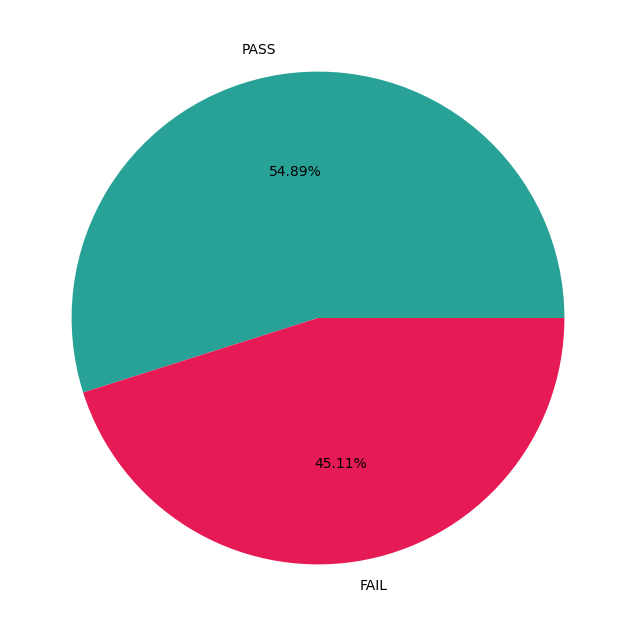

De todos los datos de películas entre 1874 y 2023 el 54.89% pasarían el test y el 45.11% no


In [53]:
'''Análisis de la variable "test_bechdel" en el DataFrame df_bech_def. Se utiliza para determinar si una película cumple con el
Test Bechdel en un gráfico de pastel, para mostrar la distribución de películas que pasan y no pasan el test. El gráfico representa dos
variables categóricas: PASS y FAIL'''

# ¿Cumple test Bechdel?

data = df_bech_def["test_bechdel"].value_counts()

# Colores
colors = ["#28A296", "#E61A54"]
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)
p = plt.gcf()
plt.show()


print(f'De todos los datos de películas entre 1874 y 2023 el 54.89% pasarían el test y el 45.11% no')

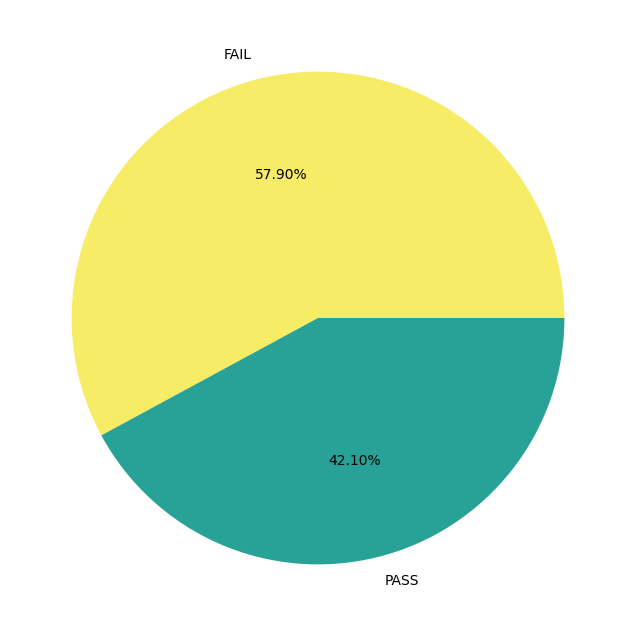

De las películas entre 1874 y 1980 el 42.50% pasarían el test y el 57.50% no


In [54]:
# Filtrar películas desde 1874 hasta el año 1980
filtered_data = df_bech_def[df_bech_def['year'] <= 1980]
data = filtered_data["test_bechdel"].value_counts()

colors = ["#F7EC66", "#28A296"]
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)
p = plt.gcf()
plt.show()

print(f'De las películas entre 1874 y 1980 el 42.50% pasarían el test y el 57.50% no')


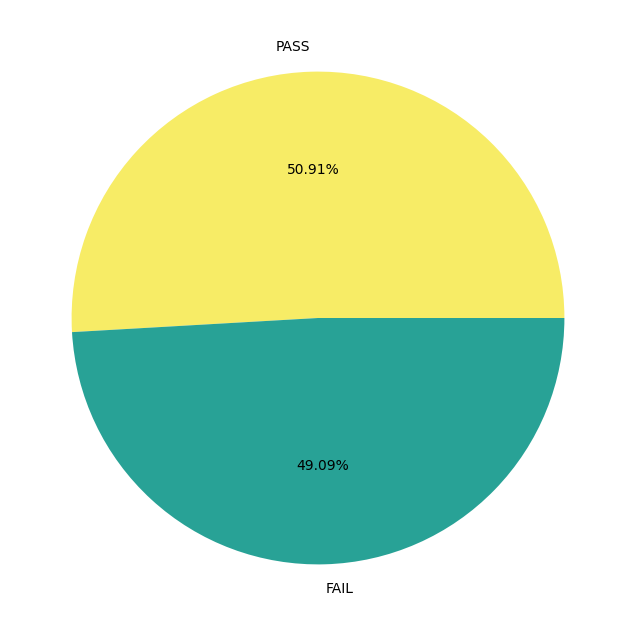

De las películas entre 1981 y 2000 el 51.34% pasarían el test y el 48.66% no


In [55]:
# Filtrar películas desde el año 1981 a 2000
filtered_data = df_bech_def[(df_bech_def['year'] >= 1981) & (df_bech_def['year'] <= 2000)]
data = filtered_data["test_bechdel"].value_counts()

colors = ["#F7EC66", "#28A296"]
plt.figure(figsize=(8, 8))

plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)

p = plt.gcf()

plt.show()

print(f'De las películas entre 1981 y 2000 el 51.34% pasarían el test y el 48.66% no')

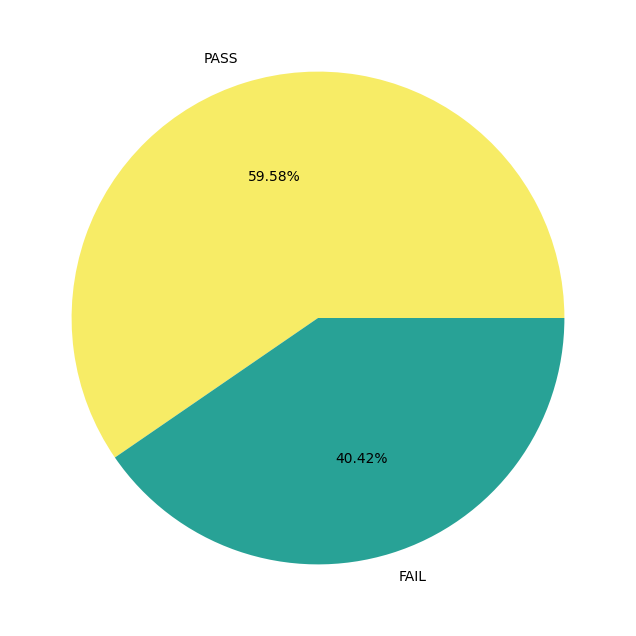

De las películas entre 2001 y 2020 el 59.49% pasarían el test y el 40.51% no


In [56]:
# Filtrar películas desde el año 2001 a 2020
filtered_data = df_bech_def[(df_bech_def['year'] >= 2001) & (df_bech_def['year'] <= 2020)]
data = filtered_data["test_bechdel"].value_counts()

colors = ["#F7EC66", "#28A296"]
plt.figure(figsize=(8, 8))

plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)
p = plt.gcf()

plt.show()

print(f'De las películas entre 2001 y 2020 el 59.49% pasarían el test y el 40.51% no')

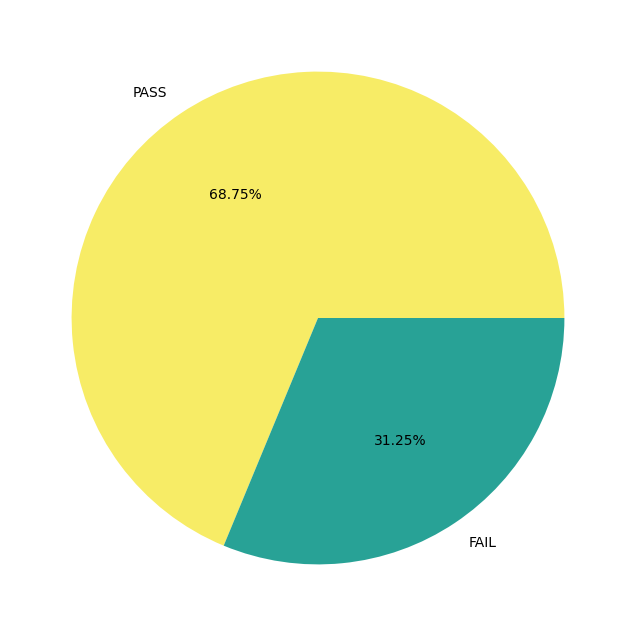

De las películas entre 2021 y 2023 el 68.61% pasarían el test y el 31.39% no


In [57]:
# Filtrar solo películas desde el año 2021 a 2023
filtered_data = df_bech_def[(df_bech_def['year'] >= 2021) & (df_bech_def['year'] <= 2023)]
data = filtered_data["test_bechdel"].value_counts()

colors = ["#F7EC66", "#28A296"]
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)
p = plt.gcf()

plt.show()
print(f'De las películas entre 2021 y 2023 el 68.61% pasarían el test y el 31.39% no')

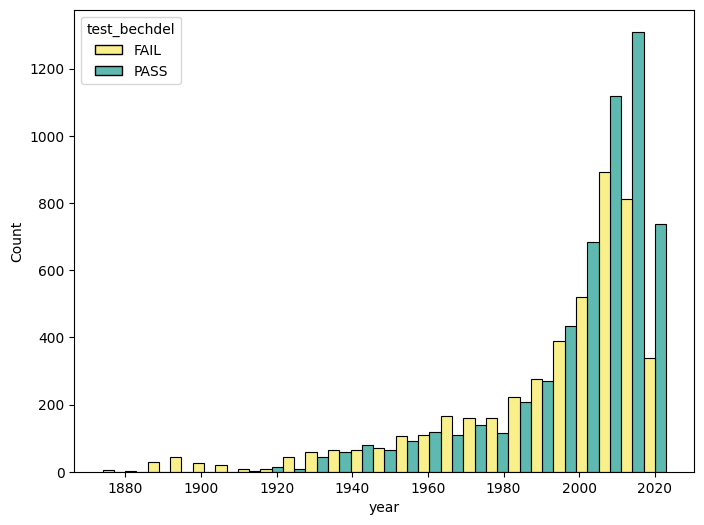

In [58]:
# Histograma: distribución de datos en función del año, con una diferenciación de colores basada en la columna "test_bechdel".

colors = ["#F7EC66","#28A296"]
plt.figure(figsize=(8, 6))
sns.histplot(x="year", hue="test_bechdel", data = df_bech_def, palette=colors, binwidth=6, multiple = "dodge")
plt.show()


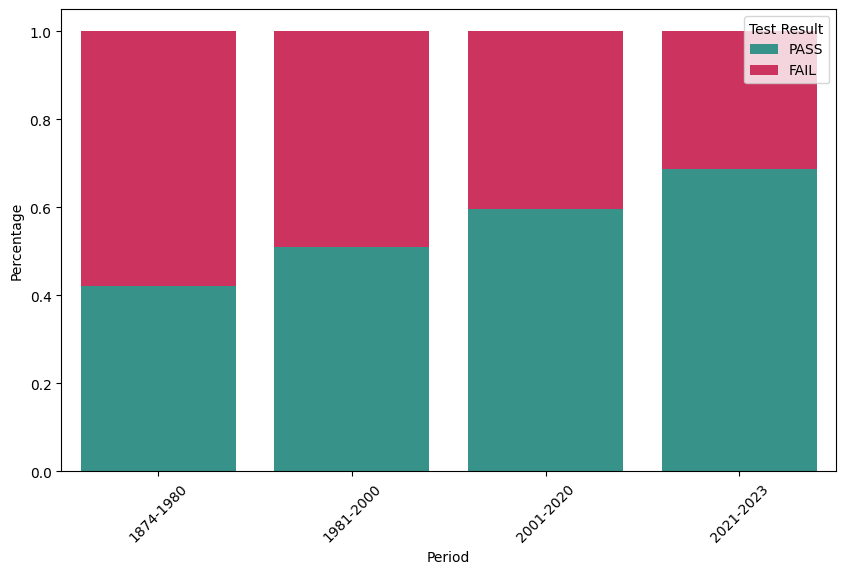

In [59]:
# Gráfico de barras apiladas, % de películas "PASS" y "FAIL" en función de los períodos
data = df_bech_def

# Años repartidos en períodos
periods = [(1874, 1980), (1981, 2000), (2001, 2020), (2021, 2023)]

# porcentaje de películas con "PASS" y porcentaje con "FAIL", por período
pass_percentages = []
fail_percentages = []

for period in periods:
    start_year, end_year = period
    subset = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    pass_percent = (subset['test_bechdel'] == 'PASS').mean()
    fail_percent = (subset['test_bechdel'] == 'FAIL').mean()
    pass_percentages.append(pass_percent)
    fail_percentages.append(fail_percent)

# DataFrame con %
period_labels = [f"{start}-{end}" for (start, end) in periods]
percentage_data = pd.DataFrame({'Period': period_labels, 'PASS': pass_percentages, 'FAIL': fail_percentages})

# colors = ["#28A296","#F7EC66"] 
colors = ["#28A296","#E61A54"]
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras de porcentajes
sns.barplot(x="Period", y="PASS", data=percentage_data, color=colors[0], label="PASS")
sns.barplot(x="Period", y="FAIL", data=percentage_data, color=colors[1], bottom=percentage_data["PASS"], label="FAIL")

plt.xlabel("Period")
plt.ylabel("Percentage")
plt.legend(title="Test Result", loc="upper right")

plt.xticks(rotation=45)  # Rotar etiquetas

plt.show()


In [60]:
pass_percentages

[0.4209710743801653, 0.5091358024691358, 0.5958027640334413, 0.6875]

In [61]:
fail_percentages

[0.5790289256198347, 0.4908641975308642, 0.4041972359665586, 0.3125]

## df_1 + df_2 + df_3 (Bechdel) 

In [62]:
# Crear data frame de df_bech_def (df_1+df_2) solo de películas de 2023

df_12_2023 = df_bech_def[df_bech_def['year'] == 2023]

In [63]:
df_12_2023

,year,title,test_bechdel
10077,2023,Spider-Man: Across the Spider-Verse,PASS
10078,2023,Reflect,PASS
10079,2023,Ant-Man and the Wasp: Quantumania,PASS
10080,2023,Pathaan,PASS
10082,2023,Infinity Pool,FAIL
10083,2023,Astérix et Obélix: L'Empire du Milieu,PASS
10084,2023,Cocaine Bear,PASS
10085,2023,Les choses simples,FAIL
10086,2023,65,FAIL
10087,2023,SCREAM VI,PASS


In [64]:
# Unir df_3. Provisionalmente, el excel creado para incluir las columnas GENDER (género del/la director/a) y
# GENRE (género de la película), son solo las películas del 2023, con el objetivo de poder continuar en el trabajo
# con lo relativo a estas correlaciones, pero está pendiente hacer el dataframe completo.

df_bechdel_2023 = pd.merge(df_12_2023, df_3, on='title', how='outer')

In [65]:
df_bechdel_2023

,year,title,test_bechdel,dir_gender,genre
0,2023,Spider-Man: Across the Spider-Verse,PASS,M,animación
1,2023,Reflect,PASS,M,corto
2,2023,Ant-Man and the Wasp: Quantumania,PASS,M,acción
3,2023,Pathaan,PASS,M,acción
4,2023,Infinity Pool,FAIL,M,terror
5,2023,Astérix et Obélix: L'Empire du Milieu,PASS,M,aventura
6,2023,Cocaine Bear,PASS,F,comedia
7,2023,Les choses simples,FAIL,M,comedia
8,2023,65,FAIL,M,acción
9,2023,SCREAM VI,PASS,M,terror


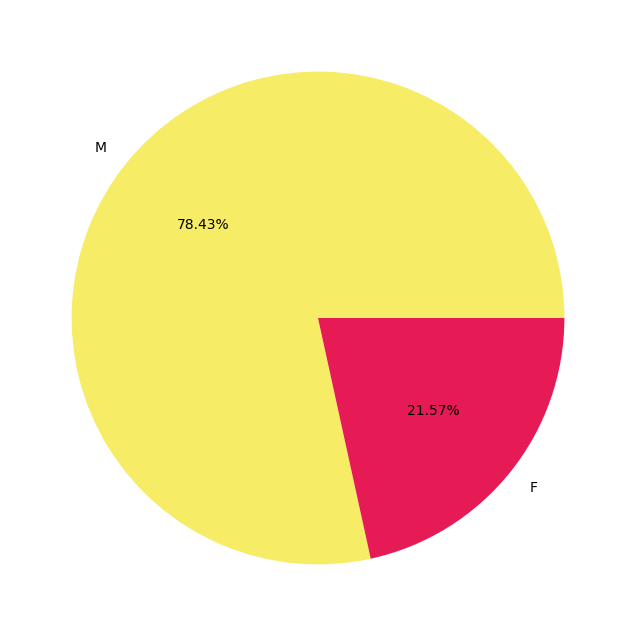

In [66]:
# % de películas dirigidas por Male o Female (de entre las de 2023)

data = df_bechdel_2023["dir_gender"].value_counts()

colors = ["#F7EC66", "#E61A54"]
plt.figure(figsize=(8, 8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%', colors=colors)
p = plt.gcf()

plt.show()

Género director/a - Bechdel

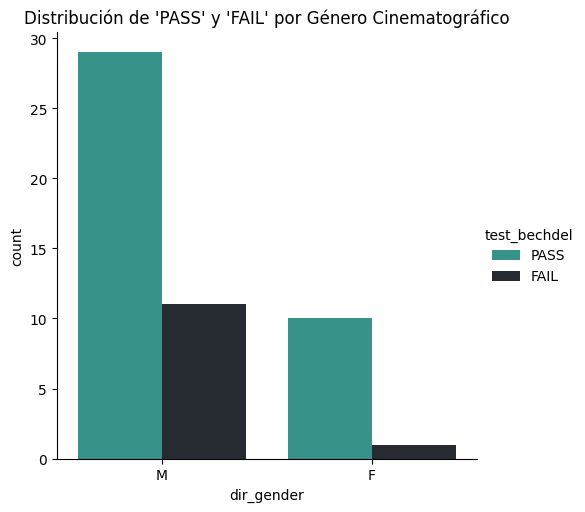

In [70]:
# Correlación cumple Bechdel - Género de la director/a 
# Definir colores personalizados
colors = ["#28A296","#242A34"]

# Crear un gráfico de barras apiladas con colores personalizados
g = sns.catplot(x="dir_gender",
                hue="test_bechdel",
                kind="count",
                edgecolor=".6",
                orient="v",
                data=df_bechdel_2023,
                palette=colors)  # Establecer la paleta de colores

plt.title("Distribución de 'PASS' y 'FAIL' por Género Cinematográfico")
plt.show()

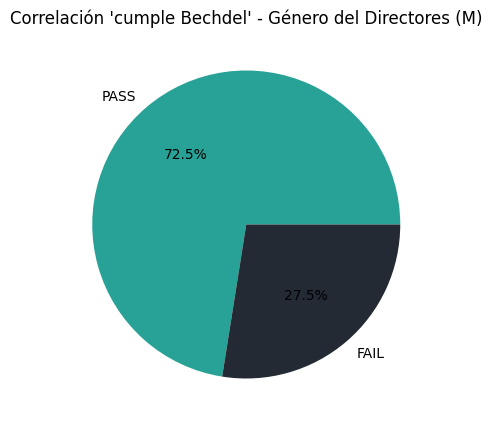

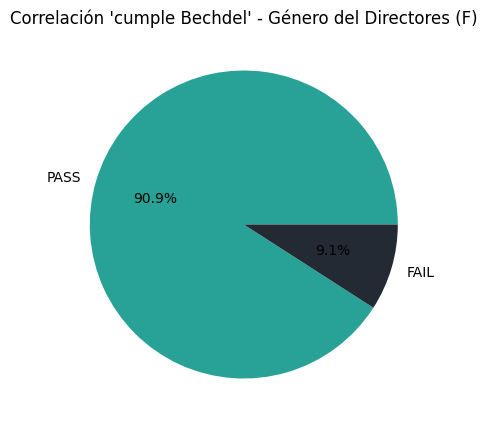

In [71]:
colors = ["#28A296", "#242A34"]

# Filtrar datos para género M
male_data = df_bechdel_2023[df_bechdel_2023['dir_gender'] == 'M']
male_counts = male_data['test_bechdel'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Correlación 'cumple Bechdel' - Género del Directores (M)")
plt.show()

# Filtrar datos para género F
female_data = df_bechdel_2023[df_bechdel_2023['dir_gender'] == 'F']
female_counts = female_data['test_bechdel'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(female_counts, labels=female_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Correlación 'cumple Bechdel' - Género del Directores (F)")
plt.show()


Género cinematográfico - Bechdel

In [72]:
df_bechdel_2023['genre'].value_counts(ascending=False)

genre
comedia      13
acción       10
drama         9
terror        6
animación     4
aventura      4
biografía     3
corto         1
suspense      1
Name: count, dtype: int64

In [76]:
#Géneros de las películas (2023)
# conteo = df_bechdel_2023['genre'].value_counts(ascending=True)

Text(0.5, 1.0, 'Porcentaje de Géneros de Películas (2023)')

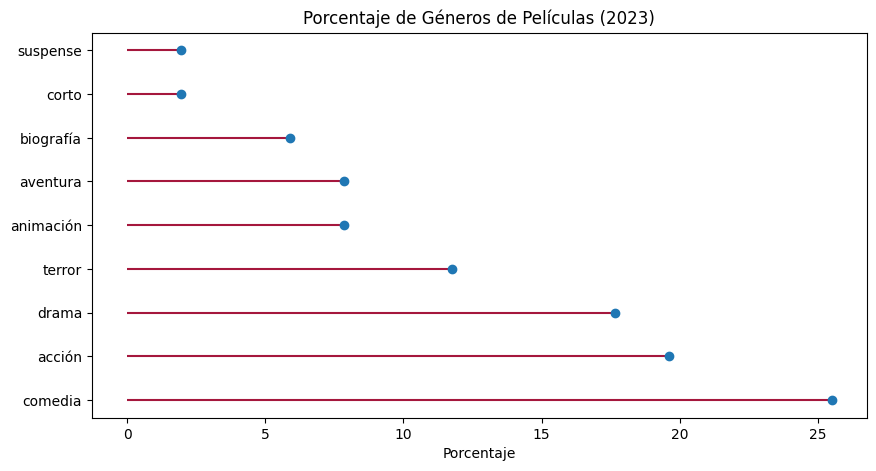

In [77]:
# Calcular el porcentaje de géneros
porcentaje = df_bechdel_2023['genre'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))
plt.hlines(y=porcentaje.index,
           xmin=0,
           xmax=porcentaje,
           color='#A5173D')
plt.plot(porcentaje, porcentaje.index, "o")
plt.xlabel('Porcentaje')
plt.title('Porcentaje de Géneros de Películas (2023)')

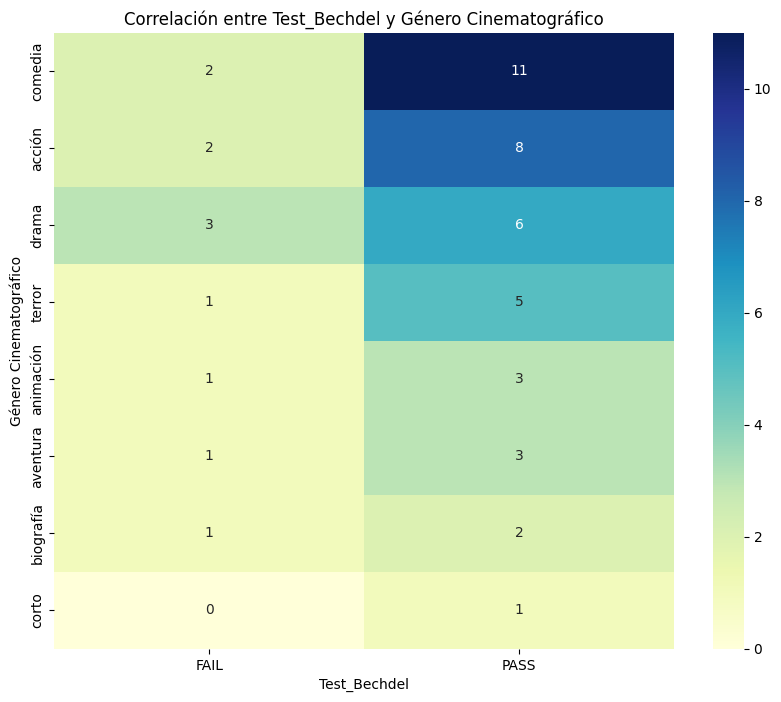

In [78]:
# Correlación Bechdel - Género de la película (heatmap)

# Calcular frecuencia de "PASS"
genre_pass_freq = df_bechdel_2023[df_bechdel_2023['test_bechdel'] == 'PASS']['genre'].value_counts()

# Ordenar las categorías por la métrica (en orden descendente)
sorted_genres = genre_pass_freq.index

# Crear una tabla de contingencia con las categorías ordenadas
contingency_table = pd.crosstab(df_bechdel_2023['genre'], df_bechdel_2023['test_bechdel'])
contingency_table = contingency_table.reindex(sorted_genres)

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Correlación entre Test_Bechdel y Género Cinematográfico")
plt.xlabel("Test_Bechdel")
plt.ylabel("Género Cinematográfico")
plt.show()


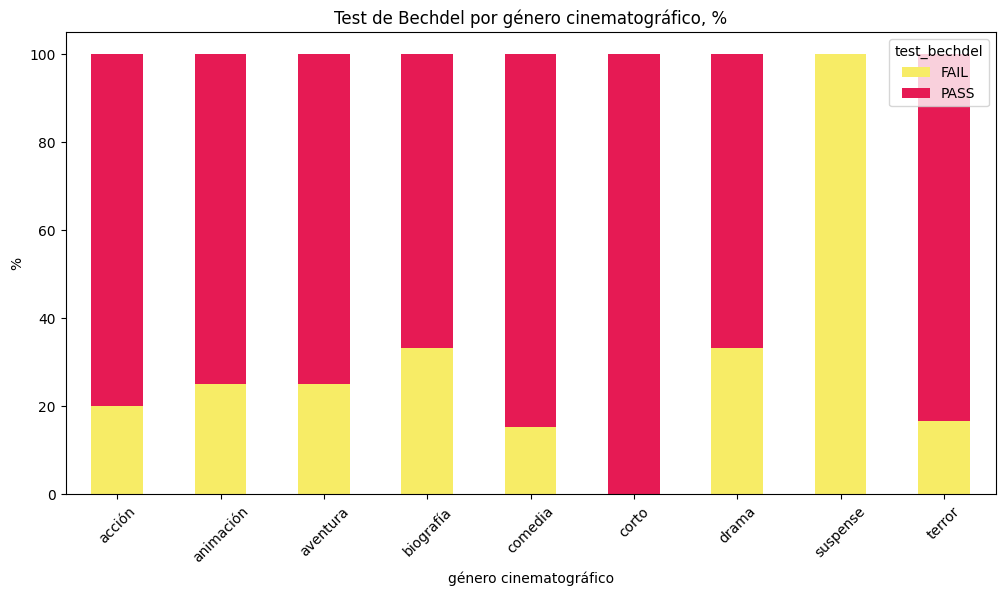

In [82]:
df_plot = df_bechdel_2023.groupby(['test_bechdel', 'genre']).size().reset_index().pivot(columns='test_bechdel',index='genre',values=0)

# Calcular los porcentajes
df_plot_percentage = df_plot.div(df_plot.sum(axis=1), axis=0) * 100


colors = ["#F7EC66", "#E61A54"]
sns.set_palette(sns.color_palette(colors))

# gráfico de barras apiladas, % de pass y fail por género de pelis
df_plot_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Test de Bechdel por género cinematográfico, %")
plt.xlabel("género cinematográfico")
plt.ylabel("%")
plt.xticks(rotation=45)
plt.show()


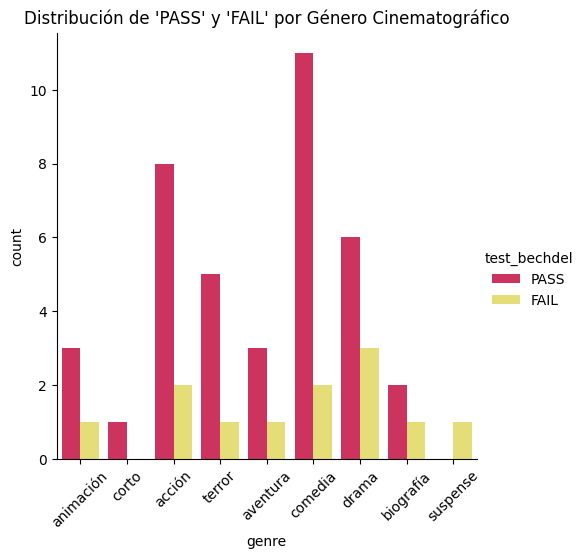

In [84]:
# gráfico de barras apiladas del test de Bechdel (pass y fail por género de peli)
colors = ["#E61A54","#F7EC66"]
g = sns.catplot(x="genre",
                hue="test_bechdel",
                kind="count",
                edgecolor=".6",
                orient="v",
                data=df_bechdel_2023,
                palette=colors)

plt.xticks(rotation=45)
plt.title("Distribución de 'PASS' y 'FAIL' por Género Cinematográfico")
plt.show()


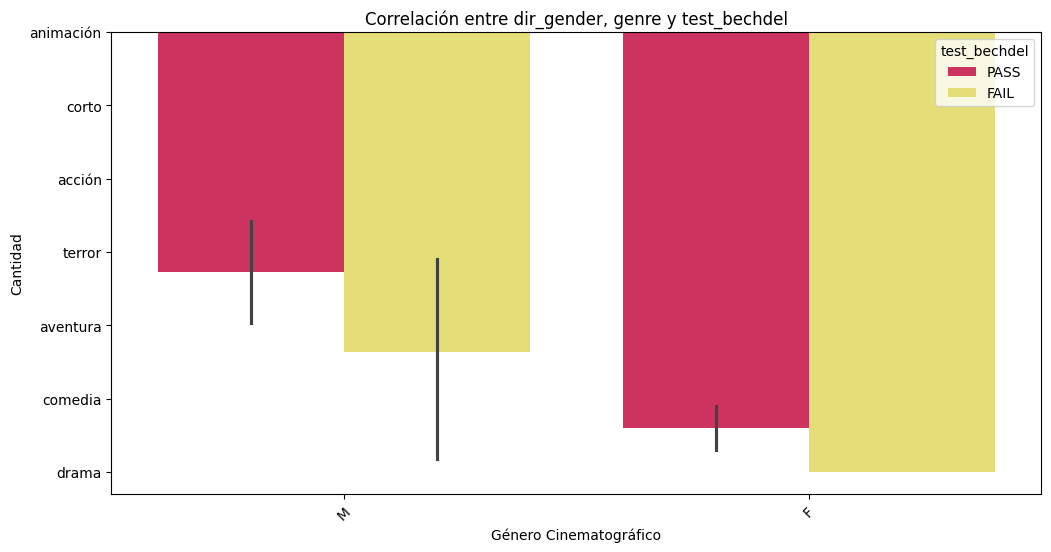

In [88]:
# ¿?¿?

colors = ["#E61A54","#F7EC66"]

plt.figure(figsize=(12, 6))
sns.barplot(x="dir_gender", y="genre", hue="test_bechdel", data=df_bechdel_2023, palette=colors)
plt.title("Correlación entre dir_gender, genre y test_bechdel")
plt.xlabel("Género Cinematográfico")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="test_bechdel", loc="upper right")
plt.show()
